# Design

## Members
นาย ธนวัฒน์ ใจมอย 1620706612 <br/>
นาย นราธิป มิ่งรัตนา 1620706471 <br/>
นางสาว นันทัชภรณ์ ลูกจันทร์ 1620707651

##CRISP-DM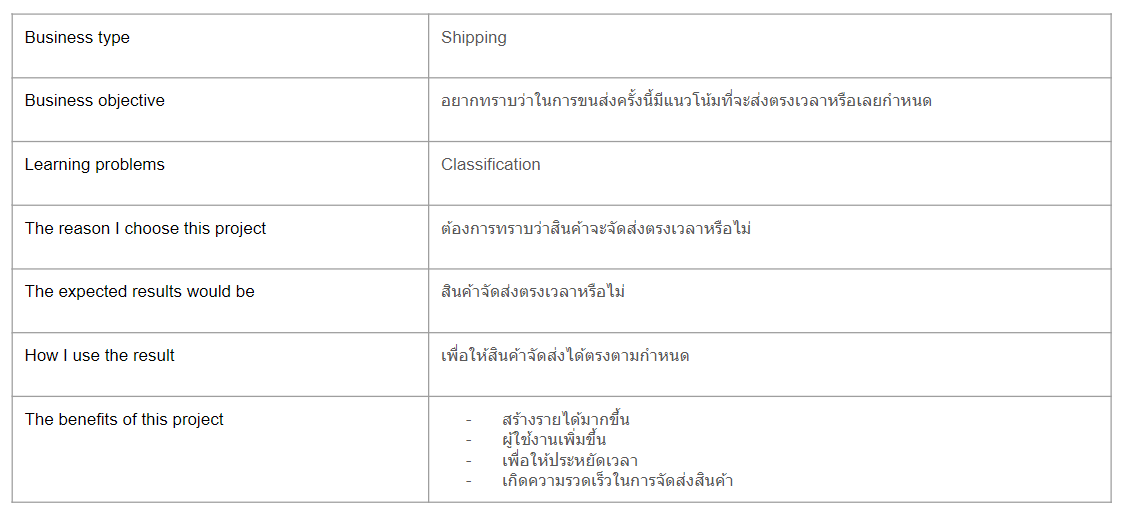

## DNA Framework 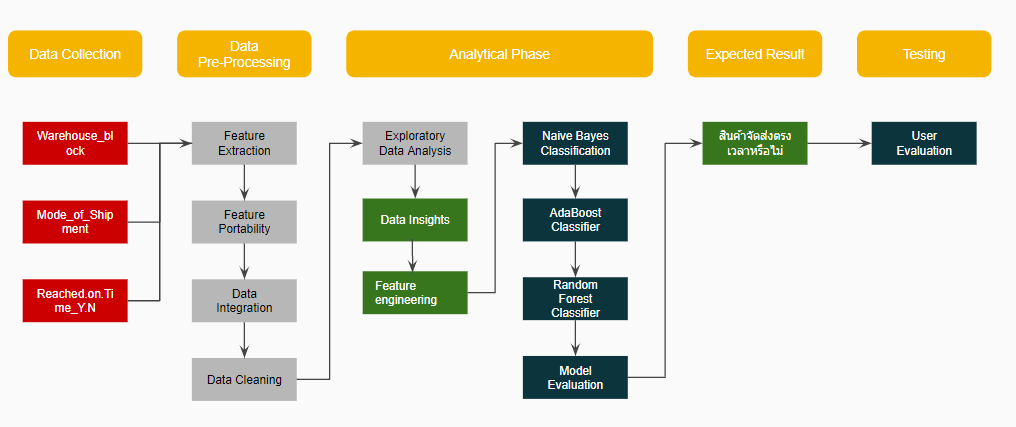

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
path = 'https://raw.githubusercontent.com/dear3089/CS434_Data_Mining_finalExam/main/E_Commerce_Shipping_Data.csv'

In [84]:
from sklearn.feature_selection import VarianceThreshold 
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier   
from sklearn.model_selection import train_test_split
from sklearn import tree

In [85]:
df_orignal = pd.read_csv(path)
df = df_orignal.copy()

In [86]:
df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


### ควมหมายของแต่ละ columns
### ID : หมายเลขประจำตัวลูกค้า
### Warehouse_block : โกดังแบ่งออกเป็น บล็อก A B C D F
### Mode_of_Shipment : การจัดส่งสินค้า เช่น ทางเรือ บนถนน เครื่องบิน
### Customer_care_calls : จำนวนที่ลูกค้าโทรหา Call center
### Customer_rating : บริษัทให้คะแนนลูกค้า โดย 1 = แย่สุด, 5 = ดีสุด
### Cost_of_the_Product : ต้นทุนผลิตภัณฑ์ หน่วยเป็น USD
### Prior_purchases : จำนวนการซื้อก่อนหน้า
### Product_importance : ความสำคัญของสินค้า เช่น ต่ำ, กลาง, สูง
### Gender : เพศ
### Discount_offered : ส่วนลดในการนำเสนอผลิตภัณฑ์
### Weight_in_gms : น้ำหนักหน่วยเป็น กรัม
### Reached.on.Time_Y.N : การจัดส่งสินค้า 1 = ส่งไม่ตรงเวลา, 0 = ส่งตรงเวลา


#Data Preprocessing

## Check-up
### ตรวจสอบข้อมูลที่ได้นำเข้ามาใช้

In [87]:
df.shape

(10999, 12)

In [88]:
# Check Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [89]:
#Checking for null values using
df.isna().sum() 

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
# ดูความหลากหลายของข้อมูล
df.nunique()/df.shape[0]

ID                     1.000000
Warehouse_block        0.000455
Mode_of_Shipment       0.000273
Customer_care_calls    0.000546
Customer_rating        0.000455
Cost_of_the_Product    0.019547
Prior_purchases        0.000727
Product_importance     0.000273
Gender                 0.000182
Discount_offered       0.005910
Weight_in_gms          0.366761
Reached.on.Time_Y.N    0.000182
dtype: float64

## Cleaning

### ลบข้อมูลที่ไม่ได้ใช้งานออก

In [ ]:
#Dropping unwanted column using drop method
df.drop('ID', axis = 1, inplace = True)
df.head(10)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
5,F,Flight,3,1,162,3,medium,F,12,1417,1
6,D,Flight,3,4,250,3,low,F,3,2371,1
7,F,Flight,4,1,233,2,low,F,48,2804,1
8,A,Flight,3,4,150,3,low,F,11,1861,1
9,B,Flight,3,2,164,3,medium,F,29,1187,1


#Exploratory Data Analysis

##Checking value counts of categorical columns


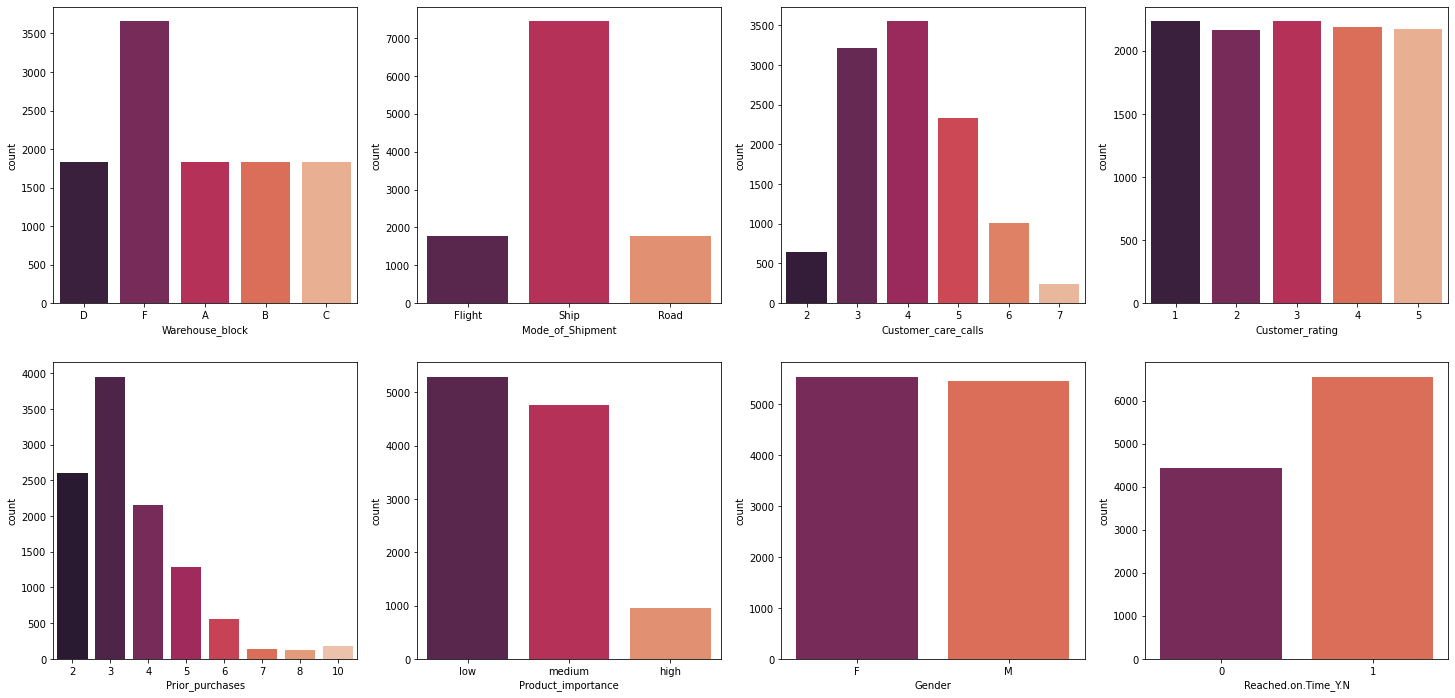

In [ ]:

cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']

plt.figure(figsize = (25, 12))
plotnumber = 1

# plotting the countplot of each categorical column.

for i in range(len(cols)):
    if plotnumber <= 8:
        ax = plt.subplot(2, 4, plotnumber)
        sns.countplot(x = cols[i], data = df, ax = ax, palette='rocket')
        
    plotnumber += 1
#plt.tight_layout()
plt.show()

##Ware_house block

In [ ]:
object_columns = df.select_dtypes(include=['object'])
warehouse = object_columns["Warehouse_block"].value_counts().reset_index() 
warehouse.columns = ['warehouse',"values"] 
fig = px.pie(warehouse,names='warehouse',values='values',color_discrete_sequence=px.colors.sequential.matter_r) 
fig.show()

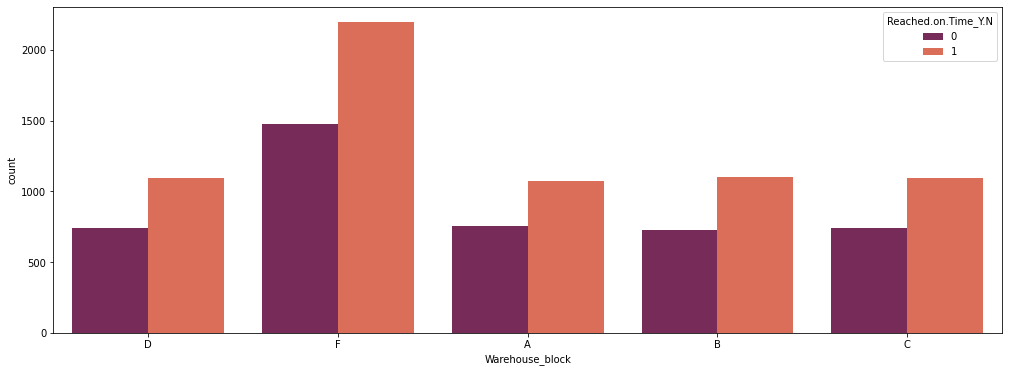

In [ ]:
#Making a countplot of warehouse column and see the effect of Reached on time or not on the warehouse column.
# เปรียบเทียบค่า Reached on time or not ของแต่ละ warehouse
plt.figure(figsize = (17, 6))
sns.countplot('Warehouse_block', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.show()

##Gender

In [ ]:
gender = object_columns['Gender'].value_counts().reset_index() 
gender.columns = ["Gender","Counts"]  
gender.drop("Gender",axis=1,inplace=True)
gender["Gender"] = ["Male","Female"]
fig = px.pie(gender,names='Gender',values='Counts',color_discrete_sequence=px.colors.sequential.Electric) 
fig.update_traces(textinfo='percent+label')

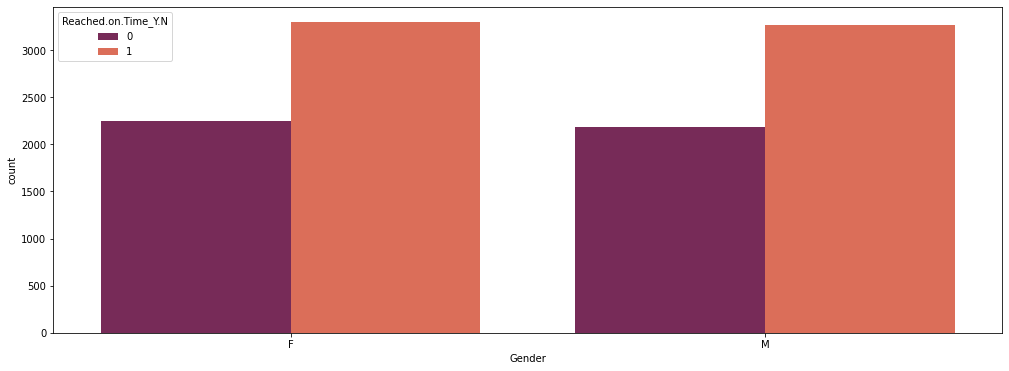

In [ ]:
#Making a countplot of gender column and see the effect of Reached on time or not on the warehouse column.
# เปรียบเทียบค่า Reached on time or not ของแต่ละ gender
plt.figure(figsize = (17, 6))
sns.countplot('Gender', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.show()

## Mode of shipment

In [ ]:
transport = object_columns["Mode_of_Shipment"].value_counts().reset_index() 
transport.columns = ["Mode","Values"] 
fig = px.pie(transport,names='Mode',values='Values',color_discrete_sequence=px.colors.sequential.Magenta_r) 
fig.update_traces(textinfo='percent+label')

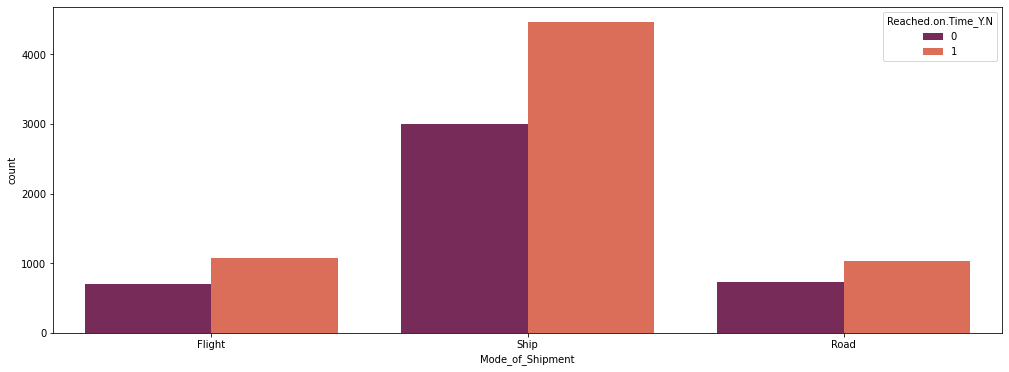

In [ ]:
# Making a countplot of mode of shipment column and see the effect of Reached on time or not on the warehouse column.
# เปรียบเทียบค่า Reached on time or not ของแต่ละ mode of shipment
plt.figure(figsize = (17, 6))
sns.countplot('Mode_of_Shipment', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.show()

##Product importance

In [ ]:
product = object_columns['Product_importance'].value_counts().reset_index() 
product.columns = ['Importance','Values'] 
fig = px.pie(product,names='Importance',values='Values',color_discrete_sequence=px.colors.sequential.Emrld_r) 
fig.update_traces(textinfo='percent+label')

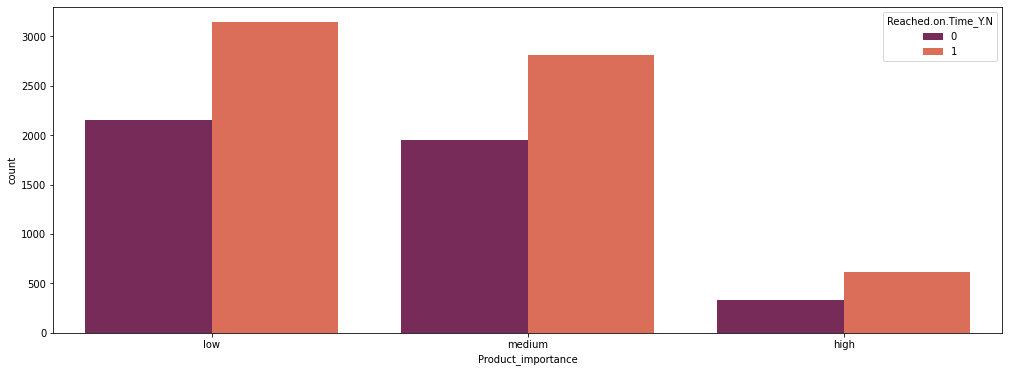

In [ ]:
# Making a countplot of product importance column and see the effect of Reached on time or not on the warehouse column.
# เปรียบเทียบค่า Reached on time or not ของแต่ละ product importance
plt.figure(figsize = (17, 6))
sns.countplot('Product_importance', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.show()

##Customer_care calls

In [ ]:
customer = df['Customer_care_calls'].value_counts()
fig = go.Figure()
fig.add_trace(go.Bar(x=customer.index, 
                     y=customer.values,
                     marker_color='#00cec9')
)
fig.update_layout(
    height=500,
    title_text='Customer care calls', 
    yaxis_title='count', 
    title_x = 0.5,
    
    font=dict(
            family="Courier New, monospace",
            size=14,
            color="black")
)

fig.show()

In [ ]:
customer = df["Customer_care_calls"].value_counts().reset_index() 
customer.columns = ["Number of times","Value"] 
fig = px.pie(customer,names="Number of times",values="Value") 
fig.update_traces(textinfo='percent+label')

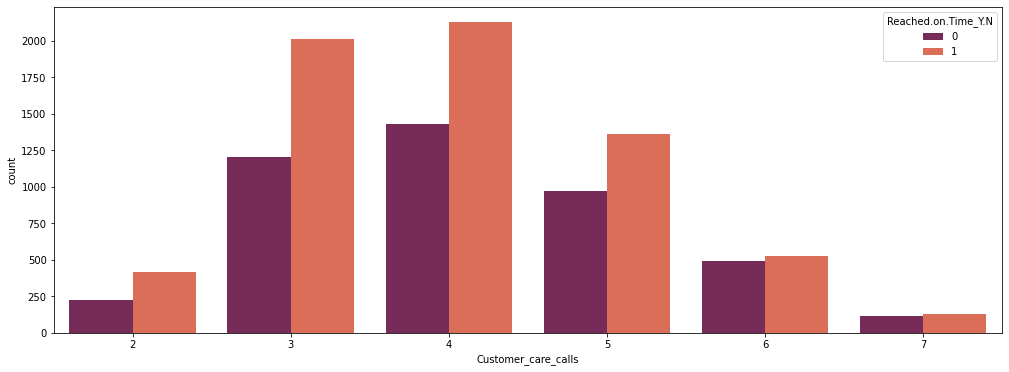

In [ ]:
# Making a countplot of customer care calls column and see the effect of Reached on time or not on the warehouse column.
# เปรียบเทียบค่า Reached on time or not ของแต่ละ customer care calls
plt.figure(figsize = (17, 6))
sns.countplot('Customer_care_calls', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.show()

##Customer ratings

In [ ]:
customer = df["Customer_rating"].value_counts().reset_index() 
customer.columns = ["Ratings","Value"] 

In [ ]:
customer["Ratings"] = ["Rating_"+str(i) for i in customer["Ratings"].tolist()]

In [ ]:
fig = px.pie(customer,names="Ratings",values="Value",color_discrete_sequence=px.colors.sequential.algae_r) 
fig.update_traces(textinfo='percent+label')

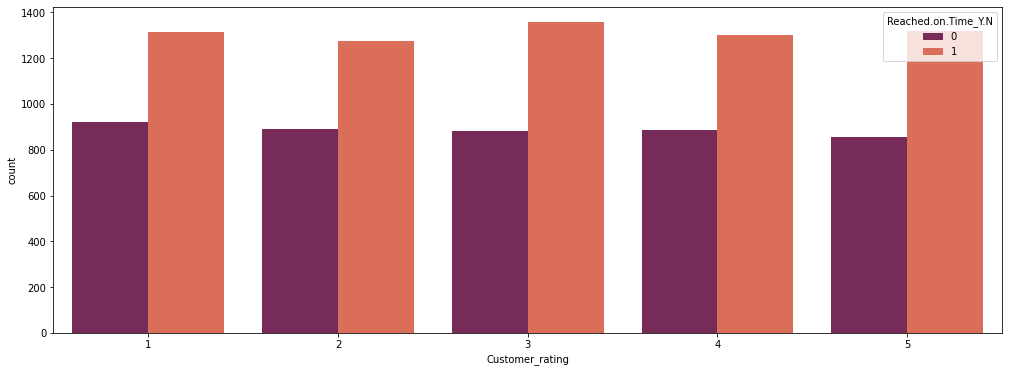

In [ ]:
#Making a countplot of customer ratings calls column and see the effect of Reached on time or not on the warehouse column.
# เปรียบเทียบค่า Reached on time or not ของแต่ละ customer ratings calls
plt.figure(figsize = (17, 6))
sns.countplot('Customer_rating', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.show()

##Prior Purchases

In [ ]:
prior_purchases = df['Prior_purchases'].value_counts()
fig = go.Figure()
fig.add_trace(go.Bar(x=prior_purchases.index, 
                     y=prior_purchases.values,
                     marker_color='#00cec9')
)
fig.update_layout(
    height=500,
    title_text='prior_purchases', 
    yaxis_title='count', 
    title_x = 0.5,
    
    font=dict(
            family="Courier New, monospace",
            size=14,
            color="black")
)

fig.show()

In [ ]:
prior_purchases = df['Prior_purchases'].value_counts().reset_index()
prior_purchases.columns = ['Prior_purchases', 'value_counts']
fig = px.pie(prior_purchases, names = 'Prior_purchases', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.matter_r, width = 650, height = 400)
fig.update_traces(textinfo = 'percent+label')

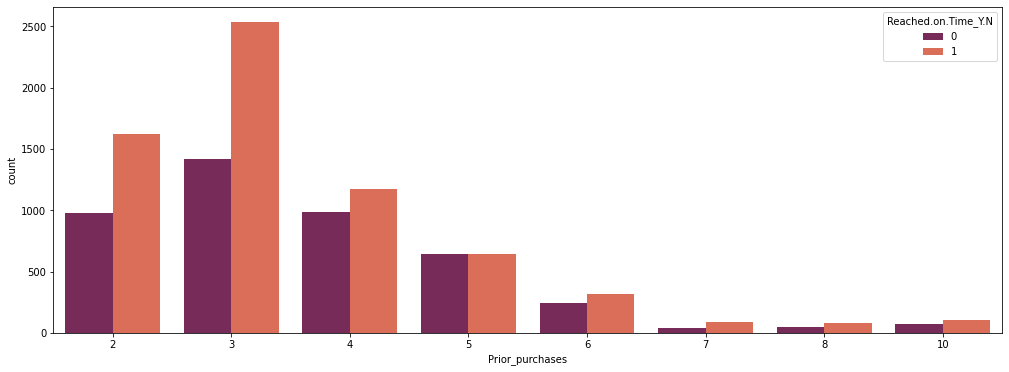

In [ ]:
# Making a countplot of prior purchases column and see the effect of Reached on time or not on the warehouse column.
# เปรียบเทียบค่า Reached on time or not ของแต่ละ prior purchases
plt.figure(figsize = (17, 6))
sns.countplot('Prior_purchases', hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
plt.show()

## Reached On time delivery

In [ ]:
reached_on_time_y_n = df['Reached.on.Time_Y.N'].value_counts().reset_index()
reached_on_time_y_n.columns = ['Reached.on.Time_Y.N', 'value_counts']
fig = px.pie(reached_on_time_y_n, names = 'Reached.on.Time_Y.N', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.Darkmint_r, width = 650, height = 400,
            hole = 0.3)
fig.update_traces(textinfo = 'percent+label')

# Encoding categorical variables

### ทำการแปลงค่าของข้อมูล จากตัวอักษร ให้เป็นตัวเลข และทำการ drop gender column ทิ้ง เพื่อเตรียมความพร้อมของข้อมูลก่อนเข้าสู่ models

In [ ]:
df_model = df.copy()

In [ ]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
# ทำการแปลงค่าของข้อมูล จากตัวอักษร ให้เป็นตัวเลข และทำการ drop gender column ทิ้ง เพื่อเตรียมความพร้อมของข้อมูลก่อนเข้าสู่ models
df_model['Warehouse_block'] = df['Warehouse_block'].map({'A' : 0, 'B': 1, 'C': 2, 'D':3, 'F': 4})
df_model['Mode_of_Shipment'] = df['Mode_of_Shipment'].map({'Flight' : 0, 'Ship': 1, 'Road': 2})
df_model['Product_importance'] = df['Product_importance'].map({'low' : 0, 'medium': 1, 'high': 2})
# df_model.drop['Gender'] = df['Gender'].apply(lambda val: 1 if val == 'M' else 0)
df_model.drop(['Gender'], axis =1,inplace=True)

In [ ]:
df_model.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,0,44,1233,1
1,4,0,4,5,216,2,0,59,3088,1
2,0,0,2,2,183,4,0,48,3374,1
3,1,0,3,3,176,4,1,10,1177,1
4,2,0,2,2,184,3,1,46,2484,1


In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Warehouse_block      10999 non-null  int64
 1   Mode_of_Shipment     10999 non-null  int64
 2   Customer_care_calls  10999 non-null  int64
 3   Customer_rating      10999 non-null  int64
 4   Cost_of_the_Product  10999 non-null  int64
 5   Prior_purchases      10999 non-null  int64
 6   Product_importance   10999 non-null  int64
 7   Discount_offered     10999 non-null  int64
 8   Weight_in_gms        10999 non-null  int64
 9   Reached.on.Time_Y.N  10999 non-null  int64
dtypes: int64(10)
memory usage: 859.4 KB


In [ ]:
# creating features and label
target = 'Reached.on.Time_Y.N'
X = df_model.drop(target, axis=1)
y = df_model[target]

In [ ]:
# spiltting our data into training and test data
# แบ่งข้อมูลเพื่อที่จะนำไปใช้ Train และทดสอบกับโมเดล โดยข้อมูลที่จะใช้ทดสอบจะถูกแบ่งออก 25%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
df_model.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,0,44,1233,1
1,4,0,4,5,216,2,0,59,3088,1
2,0,0,2,2,183,4,0,48,3374,1
3,1,0,3,3,176,4,1,10,1177,1
4,2,0,2,2,184,3,1,46,2484,1


In [ ]:
# Scaling the data using standardscaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#Models
### ทดสอบหาโมเดลที่มีความแม่นยำสูง

## Naive Bayes Classification

Classification Report of test_data 
               precision    recall  f1-score   support

           0       0.54      0.98      0.69      1135
           1       0.97      0.41      0.57      1615

    accuracy                           0.64      2750
   macro avg       0.75      0.69      0.63      2750
weighted avg       0.79      0.64      0.62      2750



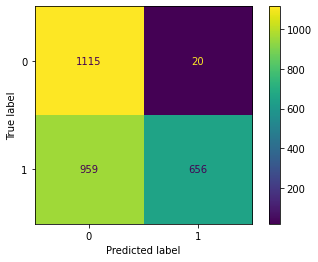

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(X_train, y_train)
test_pred1 = model1.predict(X_test)
print('Classification Report of test_data \n',classification_report(y_test,test_pred1))

confusion_matrix = plot_confusion_matrix(model1, X_test, y_test)

## Random Forest Classifier

Classification Report of test_data 
               precision    recall  f1-score   support

           0       0.56      0.67      0.61      1135
           1       0.73      0.63      0.67      1615

    accuracy                           0.65      2750
   macro avg       0.65      0.65      0.64      2750
weighted avg       0.66      0.65      0.65      2750



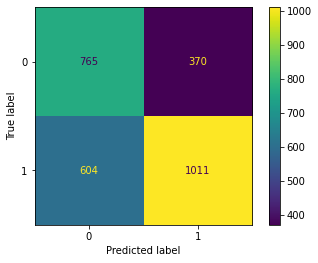

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state = 0)
model2.fit(X_train, y_train)
test_pred2 = model2.predict(X_test)
print('Classification Report of test_data \n',classification_report(y_test,test_pred2))

confusion_matrix = plot_confusion_matrix(model2, X_test, y_test)

## AdaBoost Classifier

Classification Report of test_data 
               precision    recall  f1-score   support

           0       0.58      0.81      0.68      1135
           1       0.82      0.58      0.68      1615

    accuracy                           0.68      2750
   macro avg       0.70      0.70      0.68      2750
weighted avg       0.72      0.68      0.68      2750



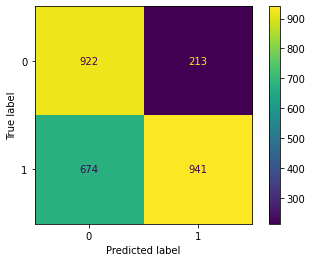

In [ ]:
from sklearn.ensemble  import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state = 0)
model3.fit(X_train, y_train)
test_pred3 = model3.predict(X_test)
print('Classification Report of test_data \n',classification_report(y_test,test_pred3))

confusion_matrix = plot_confusion_matrix(model3, X_test, y_test)

In [ ]:
# ในส่วนของ recall จะได้ RandomForestClassifier เป็นโมเดลที่มีประสิทธิภาพสูงที่สุด

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def fit_predict_score(Model, X_train, y_train, X_test, y_test):
    """Fit the model of your choice, predict for test data, and returns classification metrics."""
    model = Model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

def model_comparison(X, y):
    """Creates a DataFrame comparing Naive Bayes,
    Random Forest, AdaBoost."""
    
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

    nbc_accuracy_score, nbc_pr, nbc_re, nbc_f1 = fit_predict_score(GaussianNB(), X_train, y_train, X_test, y_test)
    rfc_accuracy_score, rfc_pr, rfc_re, rfc_f1 = fit_predict_score(RandomForestClassifier(random_state = 0), X_train, y_train, X_test, y_test)
    ada_accuracy_score, ada_pr, ada_re, ada_f1 = fit_predict_score(AdaBoostClassifier(random_state = 0), X_train, y_train, X_test, y_test)
    
    models = ['Naive Bayes', 'Random Forest', 'AdaBoost']
    accuracy = [nbc_accuracy_score, rfc_accuracy_score, ada_accuracy_score]
    precision = [nbc_pr, rfc_pr, ada_pr]
    recall = [nbc_re, rfc_re, ada_re]
    f1 = [nbc_f1, rfc_f1, ada_f1]
    
    model_comparison = pd.DataFrame(data=[models, accuracy, precision, recall, f1]).T.rename({0: 'Model',
                                                                                    1: 'Accuracy',
                                                                                    2: 'Precision',
                                                                                    3: 'Recall',
                                                                                    4: 'F1 Score'
                                                                                  }, axis=1)
    
    return model_comparison

model_comparison(X, y)

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.644,0.970414,0.406192,0.572676
1,Random Forest,0.645818,0.732078,0.626006,0.6749
2,AdaBoost,0.677455,0.815425,0.582663,0.679668


##ROC Test

<Figure size 432x288 with 0 Axes>

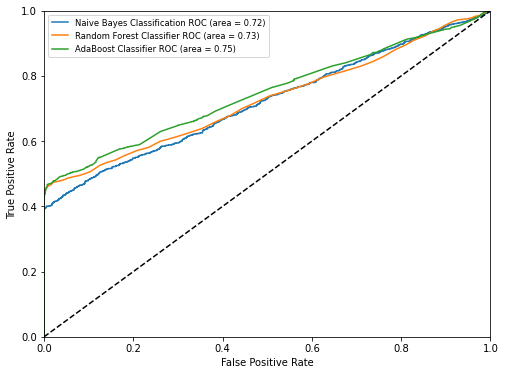

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

models = [
    {
        'label': 'Naive Bayes Classification',
        'model': model1
    },
    {
        'label' : 'Random Forest Classifier',
        'model': model2
    },
    {
        'label': 'AdaBoost Classifier',
        'model': model3
    }
]

plt.clf()
plt.figure(figsize=(8,6))
for m in models:
    m['model'].probability = True
    probas = m['model'].fit(X_train,y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

##Tuning
### ปรับโมเดลให้มีประสิทธิภาพดีที่สุด

In [ ]:
from sklearn.model_selection import GridSearchCV

# model = RandomForestClassifier(random_state=555, n_jobs=-1)

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(model2, param_grid, cv=10, scoring='recall')
grid_search_forest.fit(X_train, y_train)



GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='recall')

In [ ]:
grid_search_forest.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=50, max_features=5,
                       n_estimators=25, random_state=0)

In [ ]:
print(classification_report(y_test, 
                            grid_search_forest.best_estimator_.predict(X_test),
                            target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.57      0.61      0.59      1135
           1       0.71      0.67      0.69      1615

    accuracy                           0.65      2750
   macro avg       0.64      0.64      0.64      2750
weighted avg       0.65      0.65      0.65      2750



## Feature importance

In [ ]:
# หา Features ที่มีผลต่อโมเดลในการทำนายมากที่สุด
model_tuning = grid_search_forest.best_estimator_

In [ ]:
importances = grid_search_forest.best_estimator_.feature_importances_

In [ ]:
importances

array([0.05850466, 0.03426298, 0.0516253 , 0.05148233, 0.18035468,
       0.04913673, 0.0320988 , 0.24392737, 0.29860715])

In [ ]:
indices = np.argsort(importances)[::-1]

In [ ]:
indices

array([8, 7, 4, 0, 2, 3, 5, 1, 6])

In [ ]:
names = [X.columns[i] for i in np.argsort(model_tuning.feature_importances_)]

In [ ]:
names

['Product_importance',
 'Mode_of_Shipment',
 'Prior_purchases',
 'Customer_rating',
 'Customer_care_calls',
 'Warehouse_block',
 'Cost_of_the_Product',
 'Discount_offered',
 'Weight_in_gms']

In [ ]:
pd.DataFrame({
    'column' : X.columns,
    'importances' : importances
}).sort_values(by='importances', ascending=False)['importances'].cumsum()

8    0.298607
7    0.542535
4    0.722889
0    0.781394
2    0.833019
3    0.884501
5    0.933638
1    0.967901
6    1.000000
Name: importances, dtype: float64

In [ ]:
mod_imp = pd.DataFrame({
    'column' : X.columns,
    'importances' : importances
}).sort_values(by='importances', ascending=False)
mod_imp['cumsum'] = mod_imp['importances'].cumsum()
mod_imp

,column,importances,cumsum
8,Weight_in_gms,0.298607,0.298607
7,Discount_offered,0.243927,0.542535
4,Cost_of_the_Product,0.180355,0.722889
0,Warehouse_block,0.058505,0.781394
2,Customer_care_calls,0.051625,0.833019
3,Customer_rating,0.051482,0.884501
5,Prior_purchases,0.049137,0.933638
1,Mode_of_Shipment,0.034263,0.967901
6,Product_importance,0.032099,1.000000


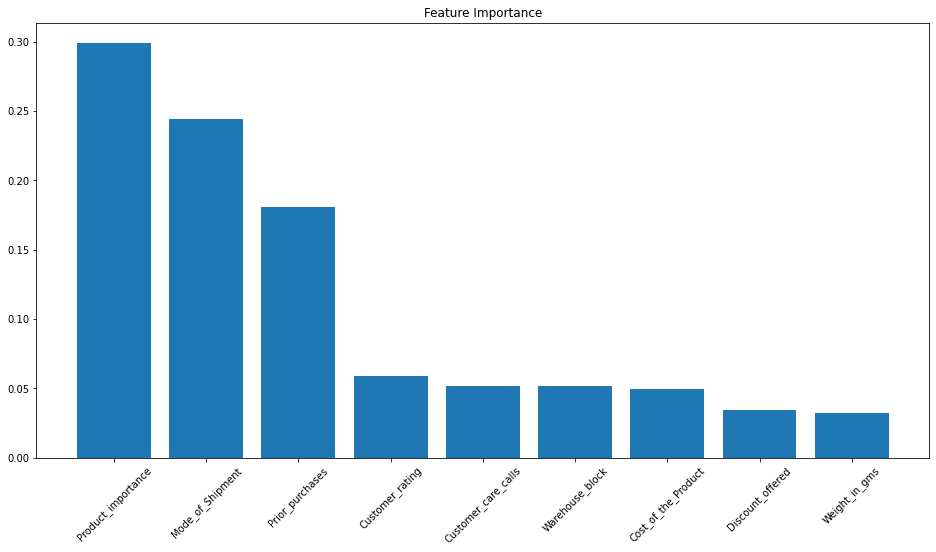

In [ ]:
# Create plot
plt.figure(figsize=(16,8))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=45)

# Show plot
plt.show()

#Pipelines

In [ ]:
from sklearn.preprocessing import LabelEncoder
class PipeLine():
  def __init__(self):
      self.mapping = {}
      self.columns = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Discount_offered', 'Weight_in_gms']
      self.target = 'Reached.on.Time_Y.N'
      self.scaler = StandardScaler()

  def encoding(self, data):
    data['Warehouse_block'] = data['Warehouse_block'].map({'A' : 0, 'B': 1, 'C': 2, 'D':3, 'F': 4})
    data['Mode_of_Shipment'] = data['Mode_of_Shipment'].map({'Flight' : 0, 'Ship': 1, 'Road': 2})
    data['Product_importance'] = data['Product_importance'].map({'low' : 0, 'medium': 1, 'high': 2})
    return data

  def build_trian(self, data):
    targets = data[self.target].copy()
    data = data[self.columns].copy()
    data = self.encoding(data)
    data = self.scaler.fit_transform(data)
    return data, targets
  
  def build_predict(self, data):
    data = data[self.columns].copy()
    data = self.encoding(data)
    return self.scaler.transform(data)

In [ ]:
# สร้างตัวแปลขึ้นมา 2 ตัว เพื่อเตรียมไว้ train ผ่าน function build_trian ของ Pipeline โดยใช้ไฟล์ df_orignal
pipeLine = PipeLine()
X_deploy, y_deploy = pipeLine.build_trian(df_orignal)

In [ ]:
# สร้างตัวแปล rft_deploy ขึ้นมารับค่าจากค่าที่ Tuning 
rft_deploy = RandomForestClassifier(bootstrap=False, max_depth=50, max_features=5,
                       n_estimators=25, random_state=0)

In [ ]:
# นำ rft_deploy มาทำการ fit หรือ train ข้อมูล
rft_deploy.fit(X_deploy, y_deploy)

RandomForestClassifier(bootstrap=False, max_depth=50, max_features=5,
                       n_estimators=25, random_state=0)

In [ ]:
df_orignal.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
test_df = pd.DataFrame({
        'ID': np.nan,
        'Warehouse_block': 'F',
        'Mode_of_Shipment': 'Flight',
        'Customer_care_calls': 4,
        'Customer_rating': 5,
        'Cost_of_the_Product': 216,
        'Prior_purchases': 2,
        'Product_importance': 'low',
        'Gender': np.nan,
        'Discount_offered': 59,
        'Weight_in_gms': 3088,
        'Reached.on.Time_Y.N': np.nan
    },index=[0])

In [ ]:
# ทำการแปลข้อมูลผ่าน build_predict แล้วนำค่าไป predict ด้วย rft_deploy
rft_deploy.predict(pipeLine.build_predict(test_df))[0]

1

In [ ]:
pipeLine.encoding(test_df)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,NaN,4,0,4,5,216,2,0,NaN,59,3088,NaN


# Evaluation

### ประเมินผลการทำโมเดล

In [ ]:
print(classification_report(y_test, 
                            grid_search_forest.best_estimator_.predict(X_test),
                            target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.57      0.61      0.59      1135
           1       0.71      0.67      0.69      1615

    accuracy                           0.65      2750
   macro avg       0.64      0.64      0.64      2750
weighted avg       0.65      0.65      0.65      2750



#Deployment

In [ ]:
!pip install gradio -q

In [ ]:
import gradio as gr

In [ ]:
# udf
def predict_shipping(Warehouse_block, Mode_of_Shipment, Customer_care_calls,Customer_rating, Cost_of_the_product, Prior_purchases,Product_importance,Discount_offered,Weight_in_gms):

    input_df = pd.DataFrame({
        'ID': np.nan,
        'Warehouse_block': Warehouse_block,
        'Mode_of_Shipment': Mode_of_Shipment,
        'Customer_care_calls': Customer_care_calls,
        'Customer_rating': Customer_rating,
        'Cost_of_the_Product': Cost_of_the_product,
        'Prior_purchases': Prior_purchases,
        'Product_importance': Product_importance,
        'Gender': np.nan,
        'Discount_offered': Discount_offered,
        'Weight_in_gms': Weight_in_gms
    },index=[0])
    pred = rft_deploy.predict(pipeLine.build_predict(input_df))[0]

    if pred == 0:
      return 'On time'
    else:
      return 'Delay'
      
# inputs

Warehouse_block = gr.inputs.Dropdown(list(df['Warehouse_block'].unique()), default='A', label='Warehouse block')
Mode_of_Shipment = gr.inputs.Dropdown(list(df['Mode_of_Shipment'].unique()), default='Flight', label='Mode of Shipment')
Customer_care_calls = gr.inputs.Slider(minimum=1, maximum=10, step=1, default=1, label='Customer_care_calls')
Customer_rating = gr.inputs.Slider(minimum=1, maximum=5, step=1, default=1, label='Customer_rating')
Cost_of_the_product = gr.inputs.Textbox(default=1, label='Cost of the product')
Prior_purchases = gr.inputs.Slider(minimum=1, maximum=10, step=1, default=1, label='Prior purchases')
Product_importance = gr.inputs.Radio(list(df['Product_importance'].unique()), label='Product importance')
Discount_offered = gr.inputs.Textbox(default=1, label='Discount offered')
Weight_in_gms = gr.inputs.Textbox(default=1000, label='Weight in gms')

iface = gr.Interface(
    fn=predict_shipping, 
    inputs=[Warehouse_block, Mode_of_Shipment, Customer_care_calls,Customer_rating, Cost_of_the_product, Prior_purchases,Product_importance,Discount_offered,Weight_in_gms],
    live=False,
    outputs='text')
iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://34556.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://34556.gradio.app')

# Reference

DataSet: <br/>

*  https://www.kaggle.com/prachi13/customer-analytics/code
*  https://www.kaggle.com/niteshyadav3103/eda-e-commerce-shipping-data
*  https://www.kaggle.com/lys620/e-commerce-shipping-eda


Article
* https://medium.com/@tong3089/data-mining-ครั้งแรก-cebebf88f2b2